In [1]:
import os, sys

from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from data_manager import *
from metadata import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Setting environment for AWS compute node


No vtk
File does not exist: /shared/CSHL_data_processed/MD635/MD635_anchor.txt
File does not exist: /shared/CSHL_data_processed/MD635/MD635_sorted_filenames.txt
File does not exist: /shared/CSHL_data_processed/MD635/MD635_cropbox.txt
File does not exist: /shared/CSHL_data_processed/MD635/MD635_cropbox.txt


In [2]:
stack = 'MD657'
_, sec2fn = DataManager.load_sorted_filenames(stack)
first_sec, last_sec = DataManager.load_cropbox(stack)[4:]

In [4]:
nissl_sections = [sec for sec, fn in sec2fn.iteritems() if not is_invalid(fn) and fn.split('-')[1][0] == 'N' and sec > first_sec and sec < last_sec]
ntb_sections = [sec for sec, fn in sec2fn.iteritems() if not is_invalid(fn) and fn.split('-')[1][0] == 'F' and sec > first_sec and sec < last_sec]

In [5]:
compare_pairs = []
for nissl_sec in nissl_sections:
    for i in range(1, 10):
        closest_nissl_sec = nissl_sec + i
        if closest_nissl_sec in nissl_sections:
            break
    compare_pairs.append((nissl_sec, closest_nissl_sec))

In [9]:
nissl2_values = np.arange(0, 257)

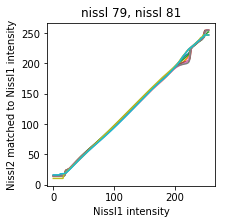

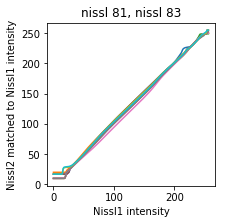

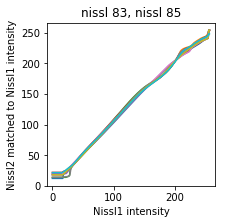

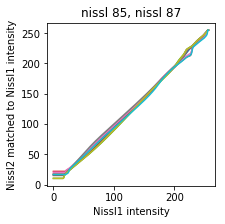

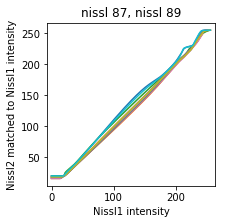

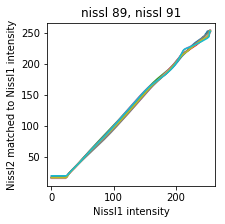

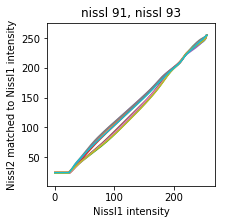

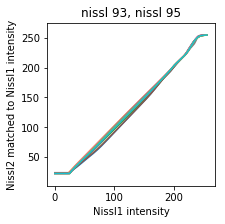

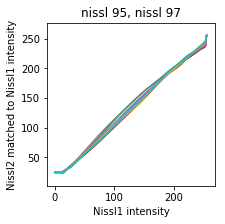

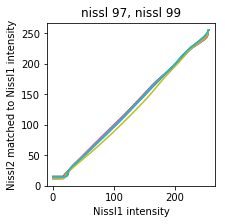

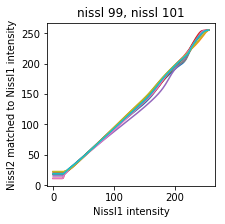

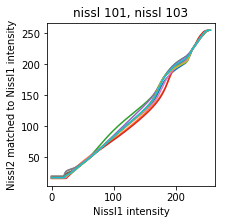

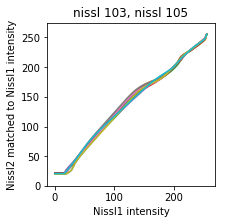

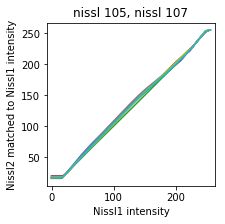

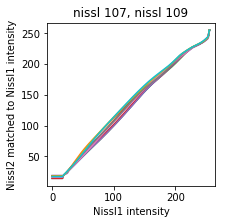

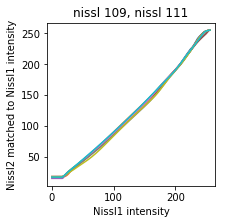

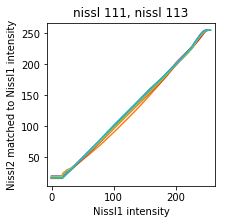

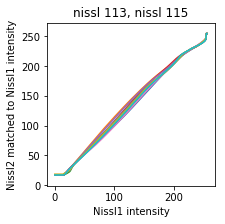

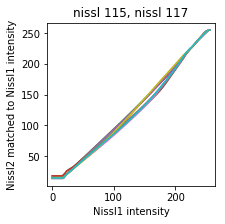

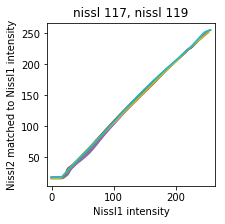

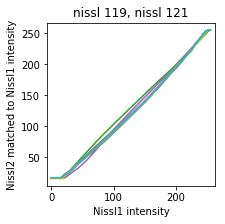

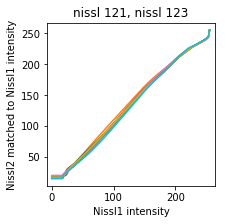

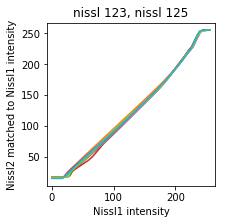

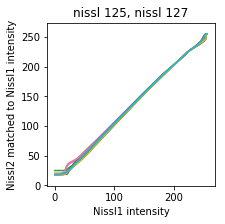

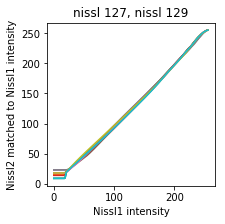

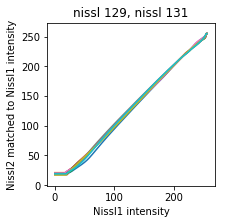

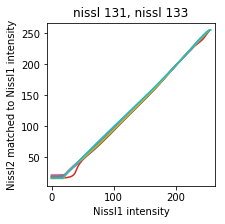

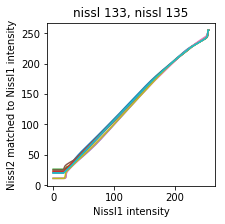

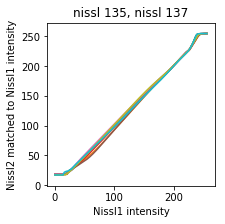

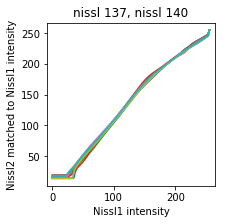

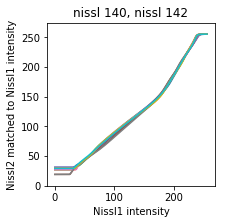

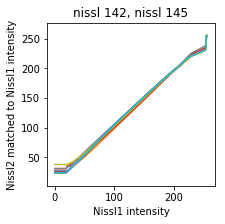

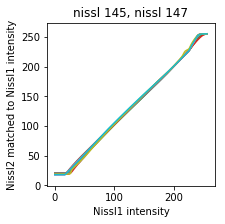

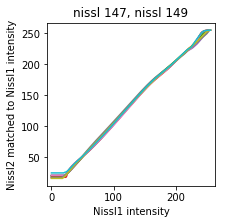

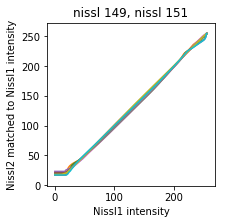

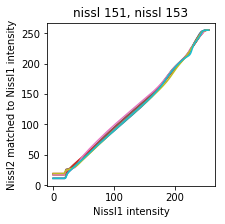

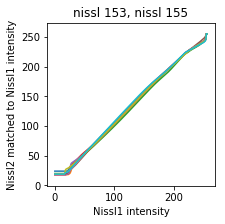

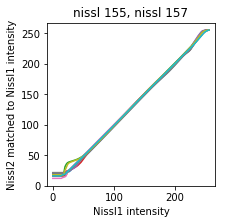

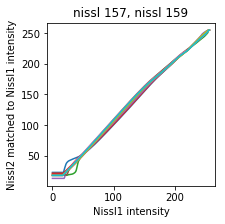

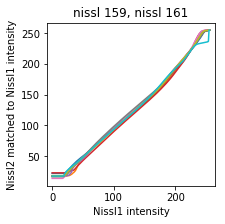

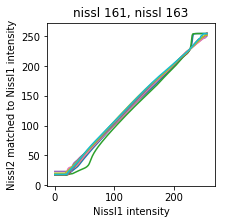

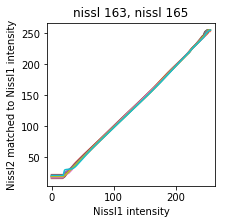

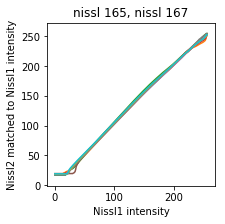

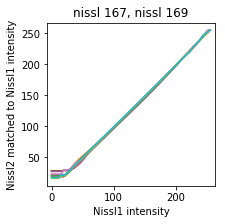

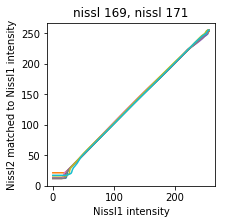

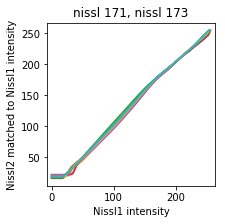

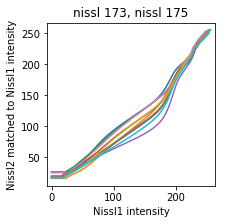

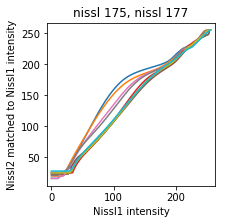

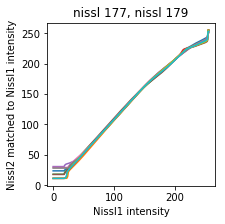

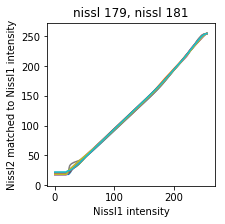

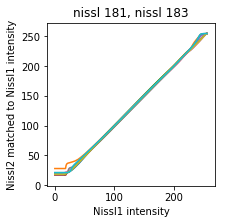

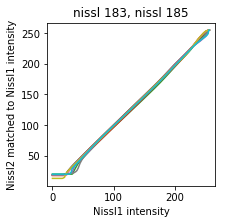

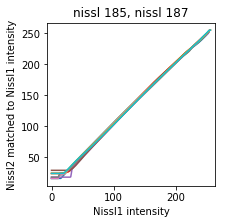

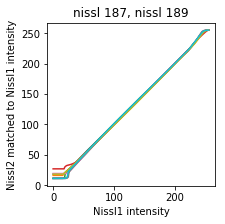

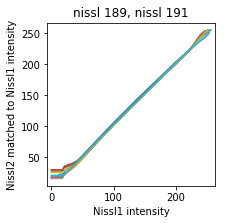

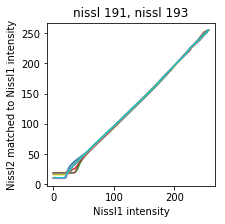

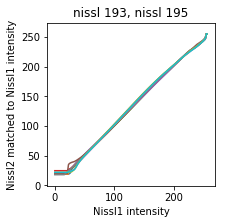

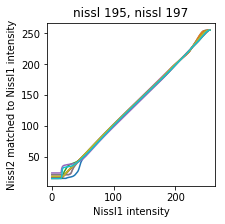

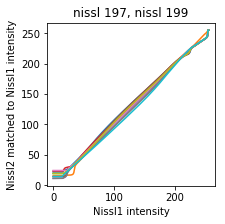

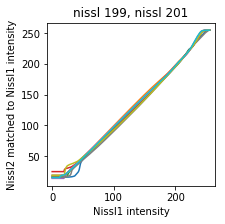

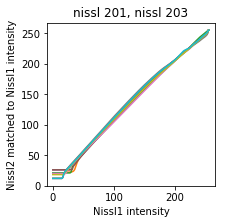

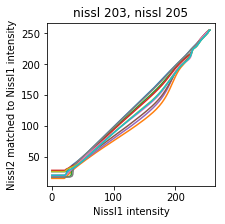

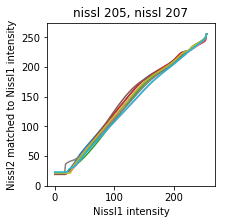

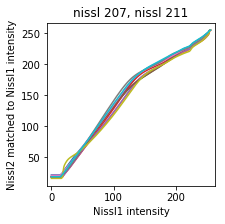

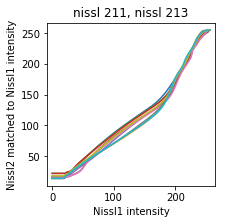

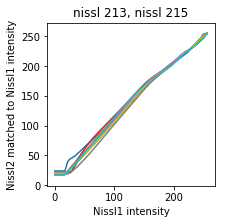

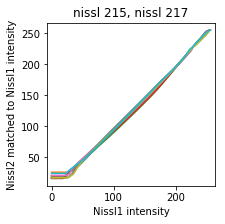

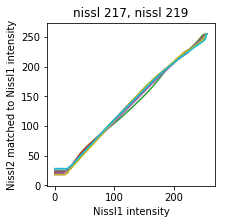

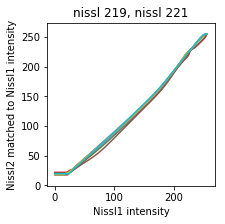

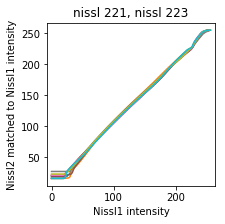

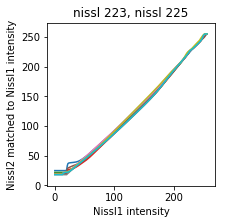

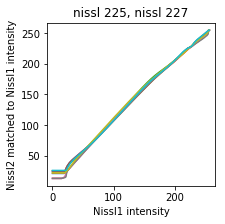

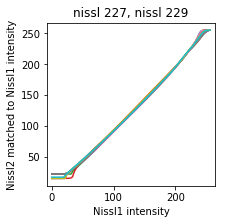

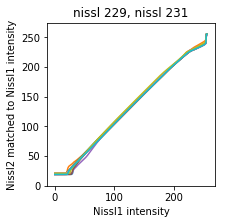

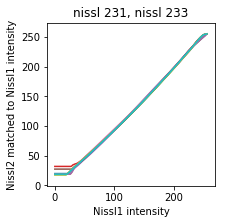

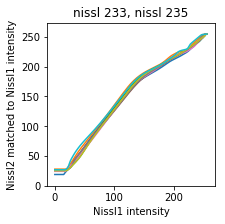

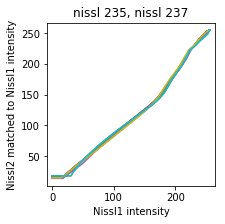

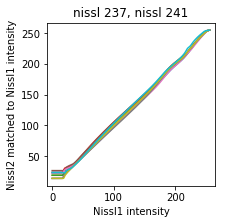

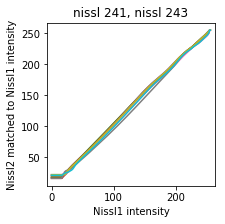

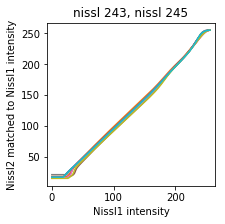

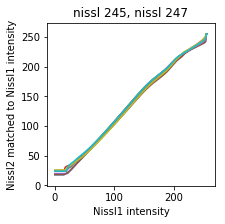

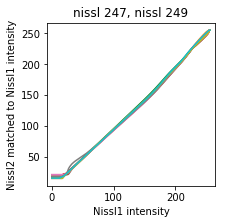

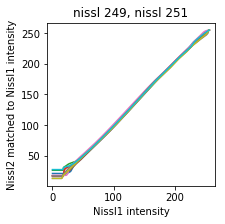

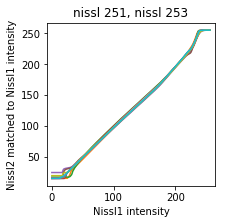

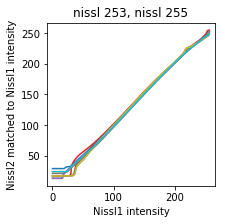

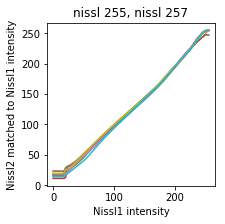

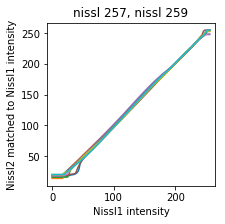

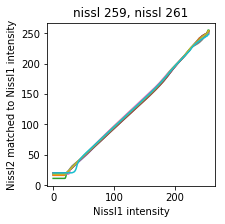

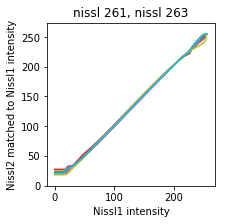

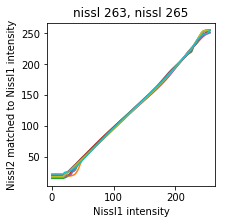

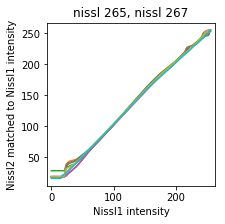

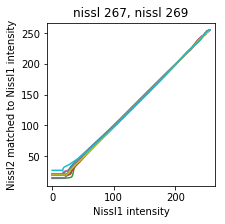

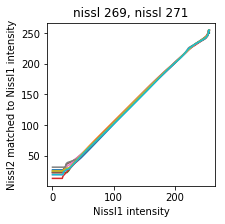

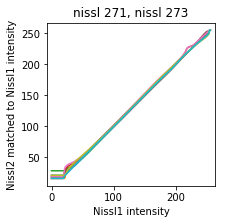

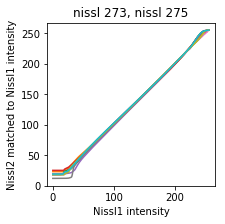

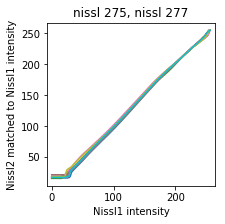

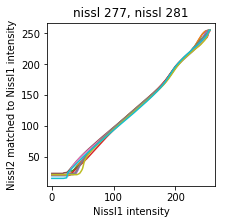

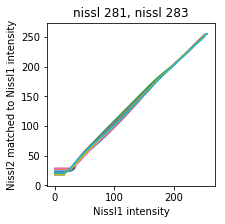

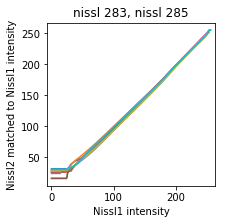

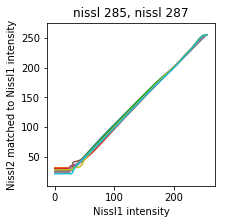

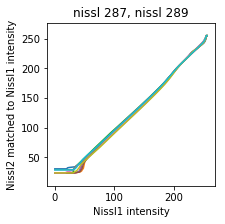

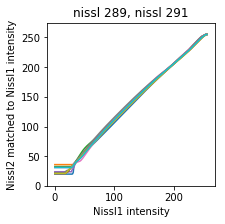

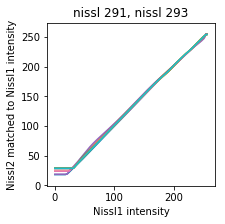

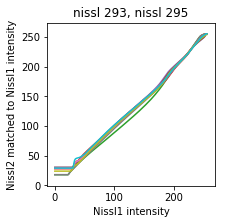

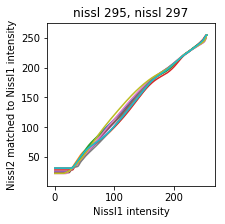

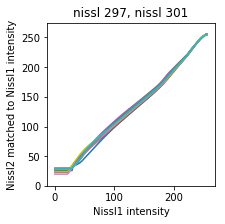

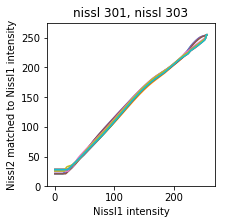

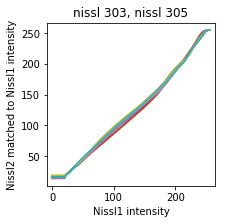

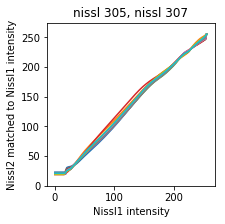

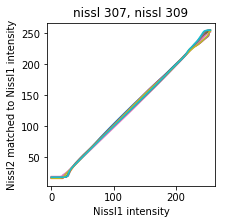

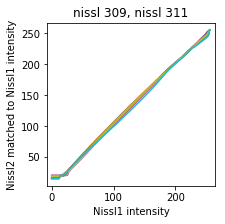

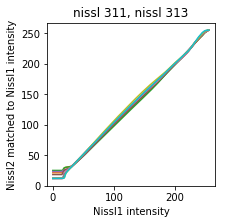

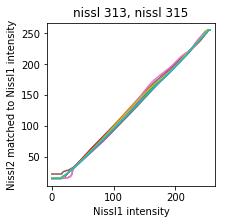

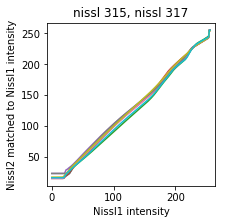

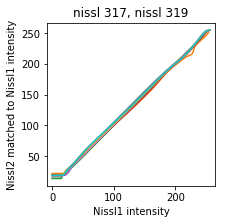

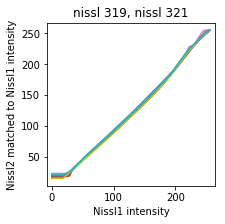

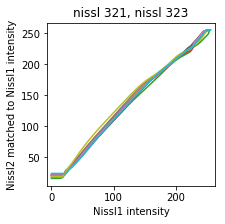

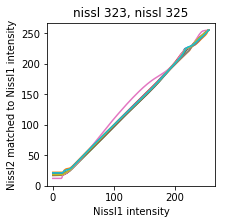

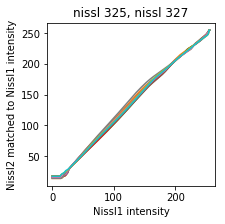

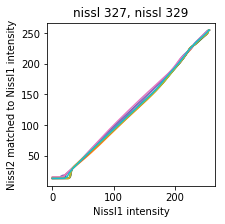

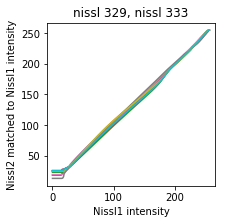

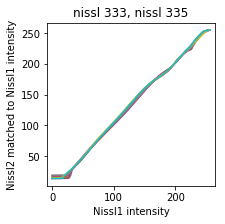

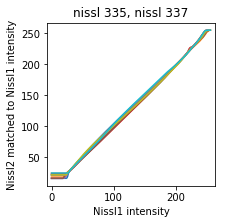

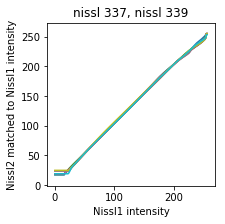

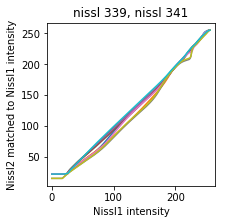

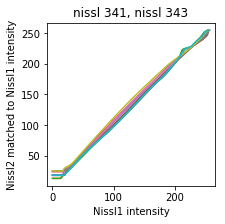

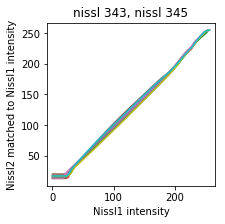

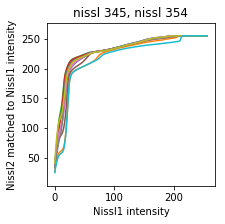

In [18]:
for nissl1_sec, nissl2_sec in compare_pairs:
        
    fp = os.path.join(DATA_DIR, stack, stack + '_histogram_matching', 'nissl_%d_to_nissl_%d.npy' % (nissl2_sec, nissl1_sec))
    nissl2_matched_values = np.load(fp)
    
    plt.figure(figsize=(3,3));
    
    plt.plot(nissl2_values, nissl2_matched_values.T);

    plt.xlim([0,256]);
    plt.ylim([0,256]);
    plt.xlabel('Nissl1 intensity');
    plt.ylabel('Nissl2 matched to Nissl1 intensity');
    plt.title('nissl %d, nissl %d' % (nissl1_sec, nissl2_sec));
    plt.axis('equal');
    plt.show();